---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [30]:
import pandas as pd
import numpy as np

- **numpy.random.binomial** *(n, p, size=None)*<br>
  Draw samples from a binomial distribution.

  Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use).
  
  **`Returns`**: ndarray or scalar<br>
Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.

In [31]:
np.random.binomial(1, 0.5)

1

In [32]:
np.random.binomial(1000, 0.5)/1000

0.512

In [33]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

10

In [34]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

97 tornadoes back to back in 2739.72602739726 years


- **numpy.random.uniform** *(low=0.0, high=1.0, size=None)*<br>
  Draw samples from a uniform distribution.

  Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn by uniform.
 
  
- The probability density function of the uniform distribution is

  p(x) = \frac{1}{b - a}

  anywhere within the interval [a, b), and zero elsewhere.

  When high == low, values of low will be returned. If high < low, the results are officially undefined and may eventually raise an error, i.e. do not rely on this function to behave when passed arguments satisfying that inequality condition.



In [35]:
np.random.uniform(0, 1)

0.87052224225739

- **numpy.random.normal** *(loc=0.0, scale=1.0, size=None)* <br>
  Draw random samples from a normal (Gaussian) distribution.

  The probability density function of the normal distribution, is often called the bell curve because of its characteristic shape.

  The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution.
  
  **loc** : float or array_like of floats. Mean (“centre”) of the distribution.

  **scale** : float or array_like of floats. Standard deviation (spread or “width”) of the distribution.

In [36]:
np.random.normal(0.75)

1.2419865082914678

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [37]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0096831024142154

- NumPy has a built-in function that you can apply, called **np.std()** for standard deviation of Distribution. 

In [38]:
np.std(distribution)

1.0096831024142154

- **Statistical functions (scipy.stats)**<br>
  This module contains a large number of probability distributions as well as a growing library of statistical functions.
 
  Each univariate distribution is an instance of a subclass of `rv_continuous` (A generic continuous random variable class meant for subclassing) and `rv_discrete` (A generic discrete random variable class meant for subclassing).

- **scipy.stats.kurtosis** *(a, axis=0, fisher=True, bias=True, nan_policy='propagate')*<br>
  Compute the kurtosis (Fisher or Pearson) of a dataset.

  Kurtosis is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.
  
  **a** : array<br>Data for which the kurtosis is calculated.

  **axis** : int or None, optional.<br>Axis along which the kurtosis is calculated. Default is 0. If None, compute over the whole array a.

In [39]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.07920070577499105

In [40]:
stats.skew(distribution)

-0.12306114075068426

- **scipy.stats.skew** *(a, axis=0, bias=True, nan_policy='propagate')* <br>
  Compute the sample skewness of a data set.

  For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function **skewtest** can be used to determine if the skewness value is close enough to zero, statistically speaking.

In [42]:
chi_squared_df6 = np.random.chisquare(6, size=10000)
stats.skew(chi_squared_df6)

1.2353210845156506

In [43]:
chi_squared_df12 = np.random.chisquare(12, size=10000)
stats.skew(chi_squared_df12)

0.8524372834618037

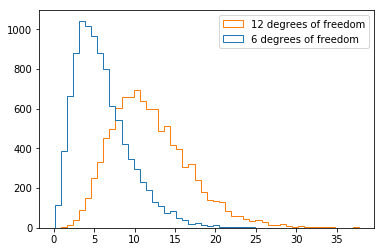

In [44]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df6,chi_squared_df12], bins=50, histtype='step', 
                  label=['6 degrees of freedom','12 degrees of freedom'])
plt.legend(loc='upper right')


- Remember that a distribution is just a shape that describes the probability of a value being pulled when we sample a population. And NumPy and SciPy each have a number of different distributions built in for us to be able to sample from.

# Hypothesis Testing

`Hypothesis testing` in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results. You’re basically testing whether your results are valid by figuring out the odds that your results have happened by chance. If your results may have happened by chance, the experiment won’t be repeatable and so has little use.<br>

`Example :` Let's say that we have an expectation that when a new course is launched on a MOOC platform, the keenest students find out about it and all flock to it. Thus, we might expect that those students who sign up quite quickly after the course is launched with higher performance than those students who signed up after the MOOC has been around for a while. In this example, we have samples from two different groups which we want to compare. The early sign ups and the late sign ups.

When we do hypothesis testing, we hold out that our hypothesis as the alternative and we create a second hypothesis called the null hypothesis, which in this case would be that there is no difference between groups. 

- Hypothesis testing can be one of the most confusing aspects for students, mostly because before you can even perform a test, you have to know what your null hypothesis is _ all you need to do is:
  - Figure out your null hypothesis,
  - State your null hypothesis,
  - Choose what kind of test you need to perform,
  - Either support or reject the null hypothesis.
  

In [55]:
df = pd.read_csv('grades.csv')

In [46]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [47]:
len(df)

2315

In [48]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [49]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [50]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

- **stats.ttest_ind** *(a, b, axis=0, equal_var=True, nan_policy='propagate')*<br>
  Calculates the T-test for the means of *two independent* samples of scores.

  This is a two-sided test for the null hypothesis that 2 independent sampleshave identical average (expected) values. This test assumes that the populations have identical variances by default.

In [51]:
from scipy import stats
stats.ttest_ind?

In [52]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [53]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [54]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

- A P-test is a statistical method that tests the validity of the null hypothesis which states a commonly accepted claim about a population.
- The smaller the p-value, the stronger the evidence that the null hypothesis should be rejected and that the alternate hypothesis might be more credible.
- The P-test statistic typically follows a standard normal distribution when large sample sizes are used.